Author: Yang
Date: 04/22/2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
%matplotlib inline

In [2]:
county_area = pd.read_csv(r"..\..\data\drought_monitor\county_area.csv")
county_area.head()
county_area.describe()

AREA            X            Y
count    3221.000000  3221.000000  3221.000000
mean     1117.229153   -91.637594    37.966028
std      3627.892230    13.310460     6.093899
min         1.998782  -163.971623    17.982748
25%       426.799022   -98.086007    34.354134
50%       617.989300   -89.944310    38.212272
75%       932.294519   -82.991492    41.694589
max    147805.089619   -65.287805    69.307273

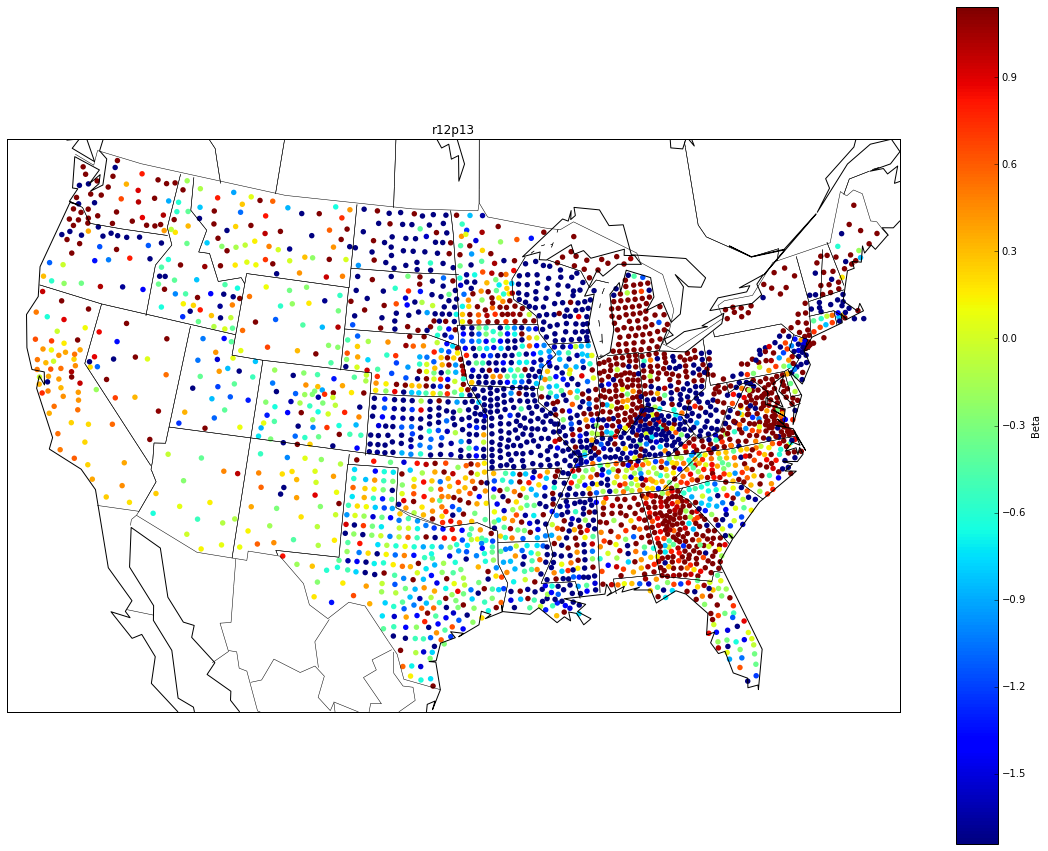

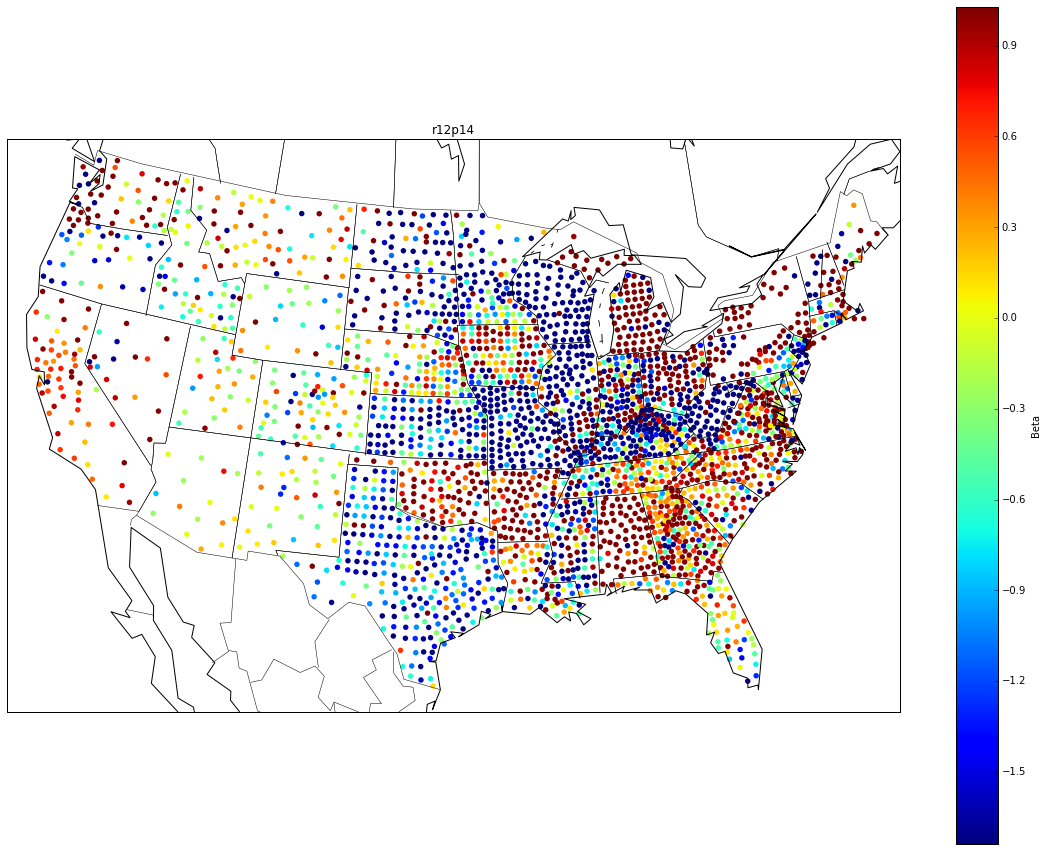

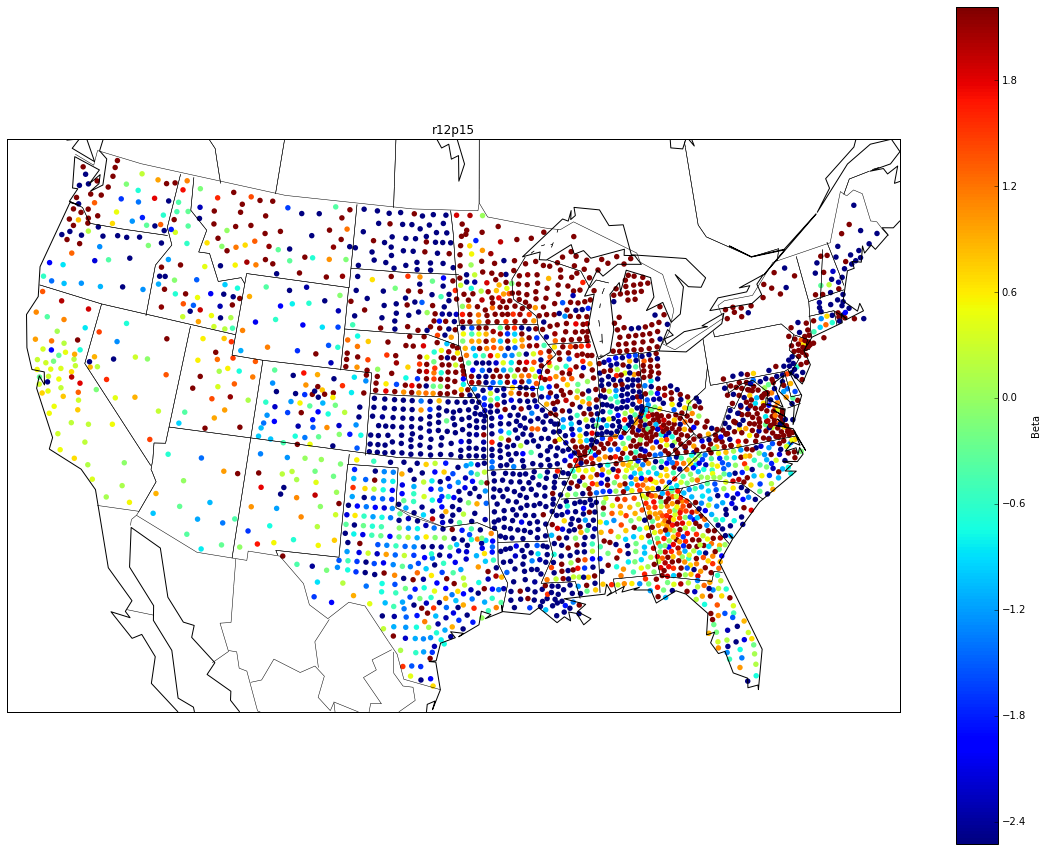

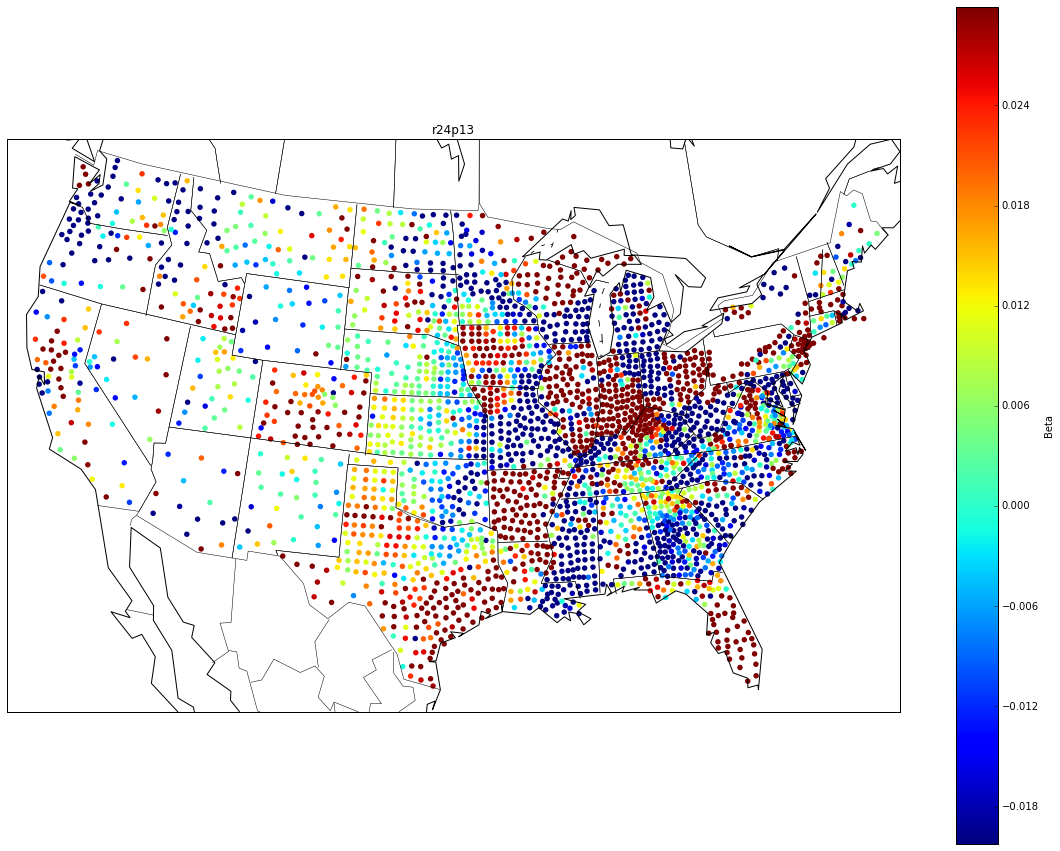

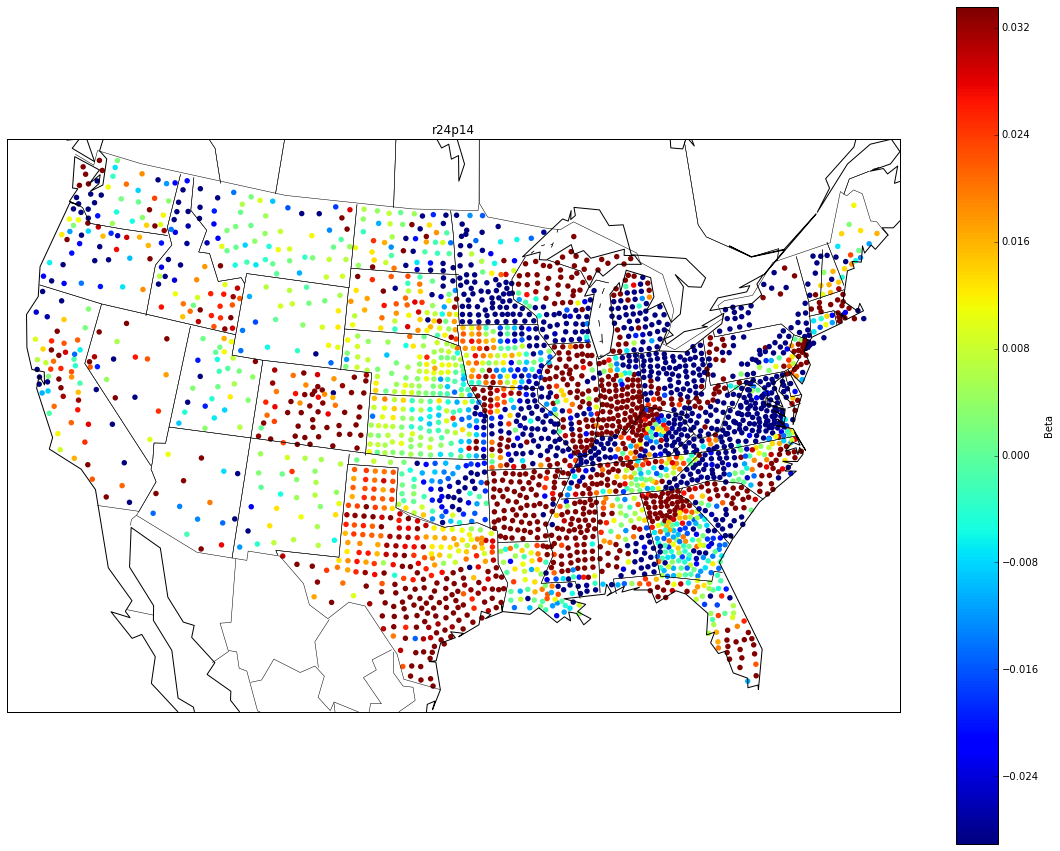

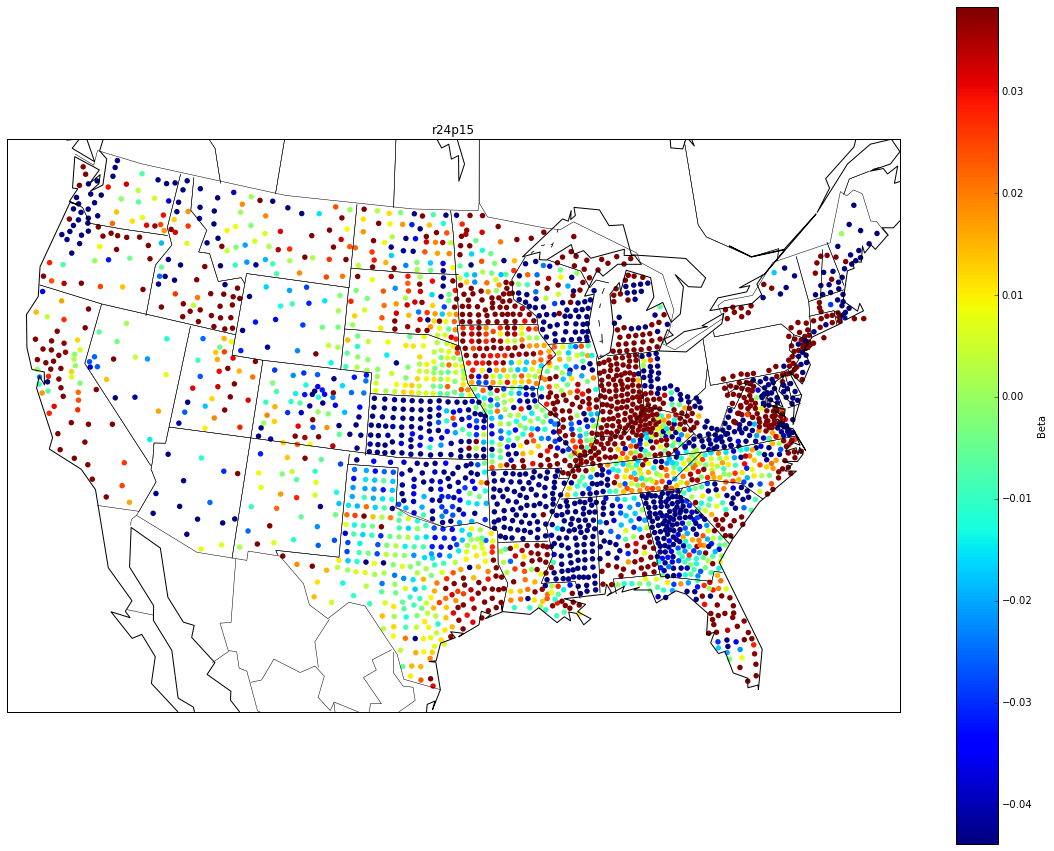

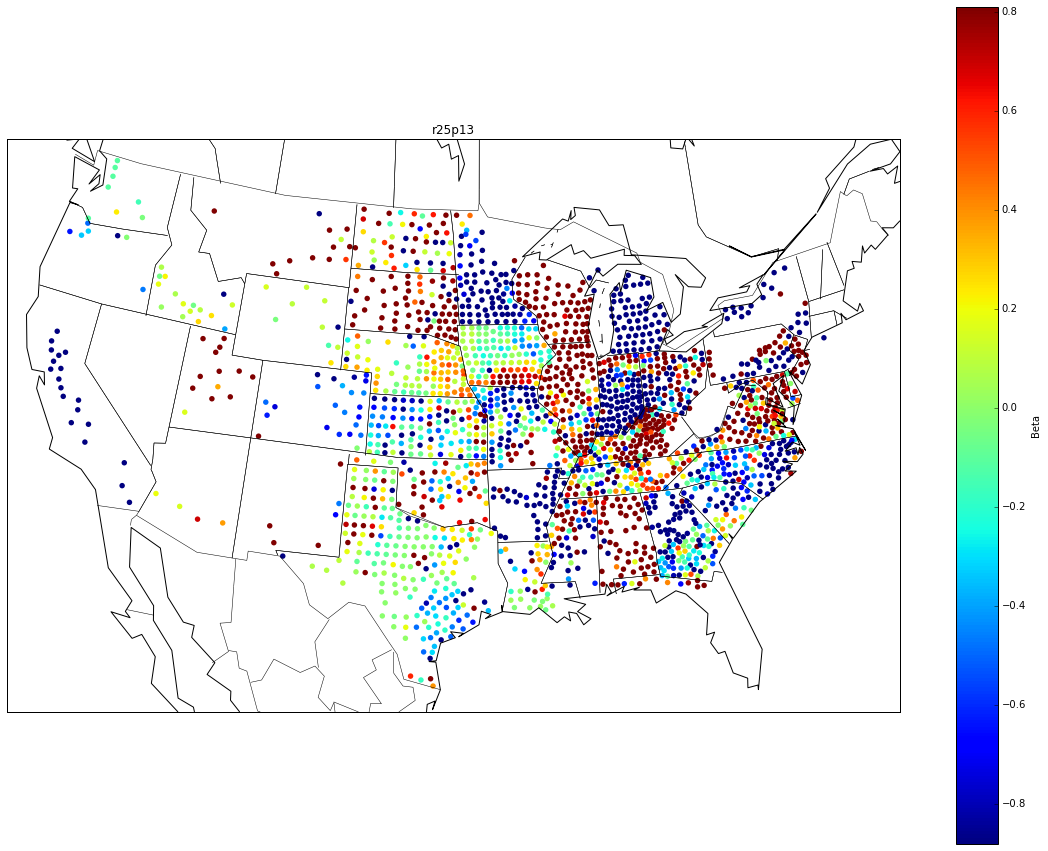

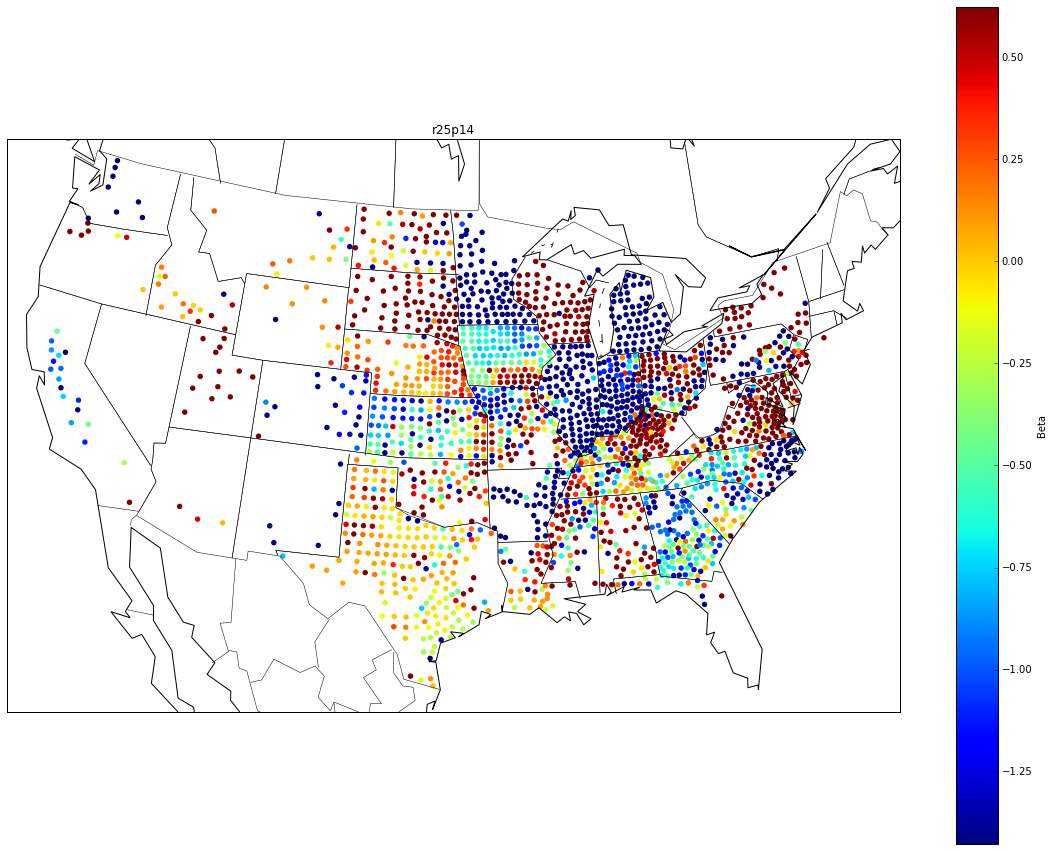

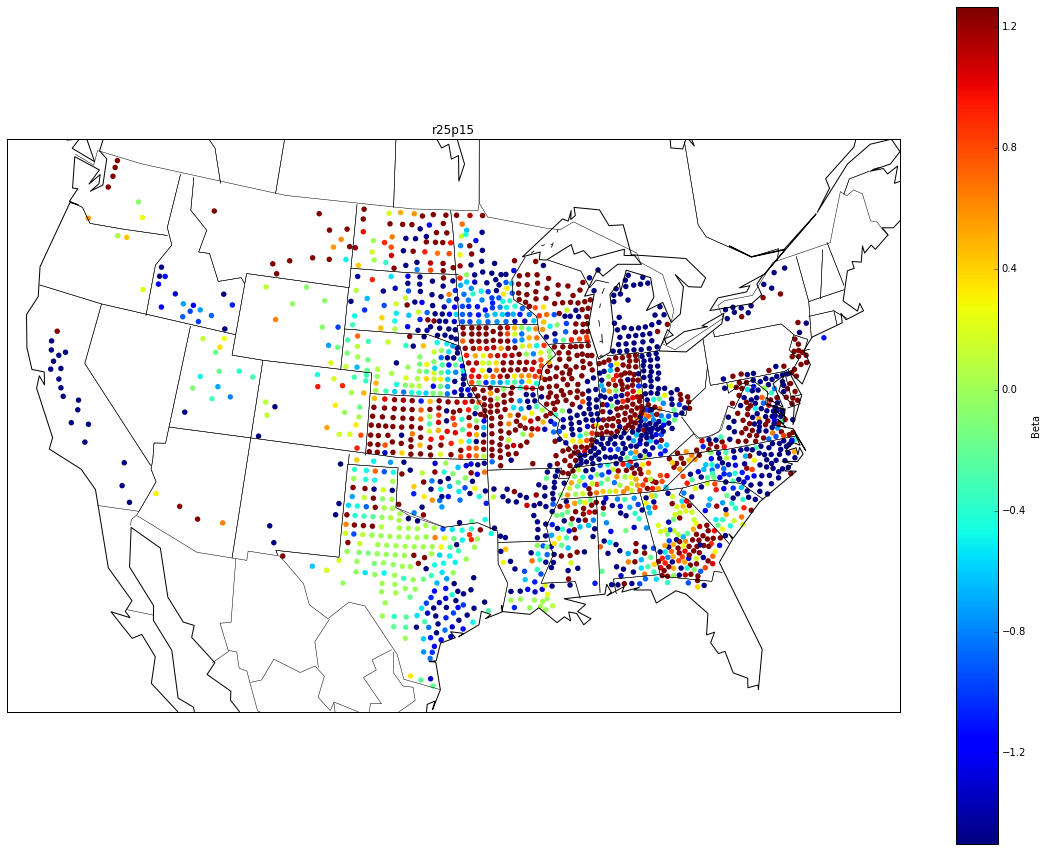

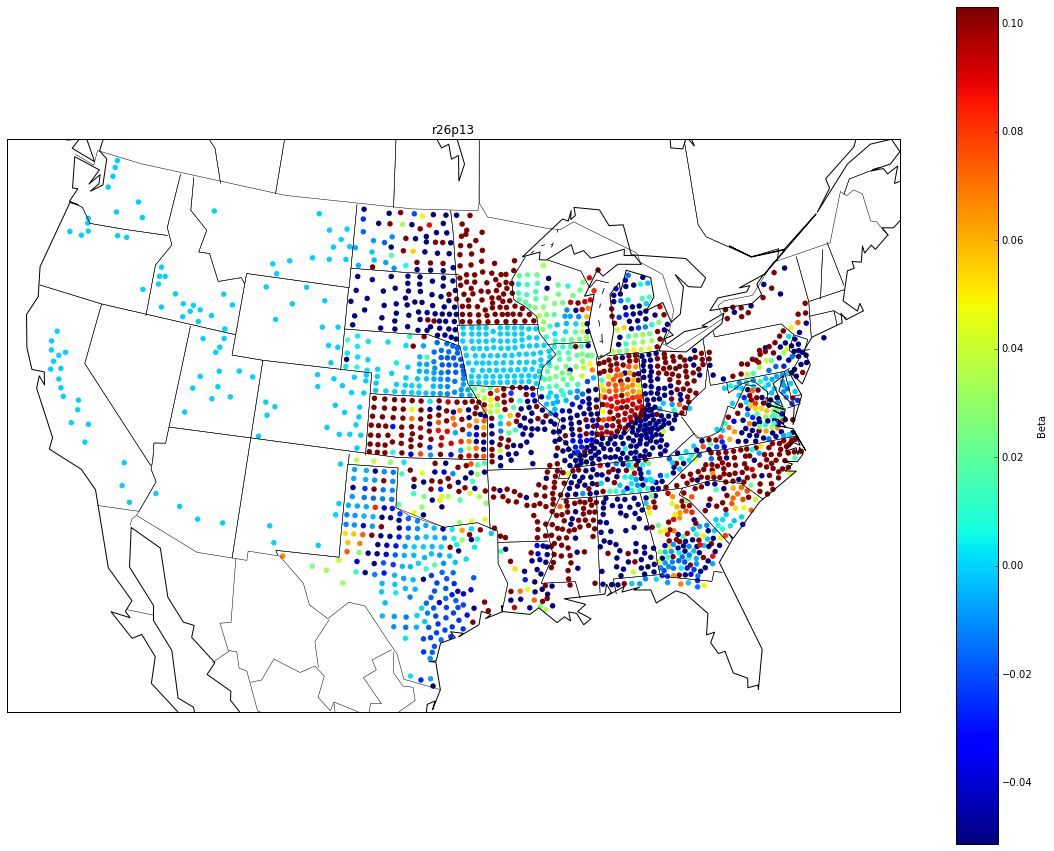

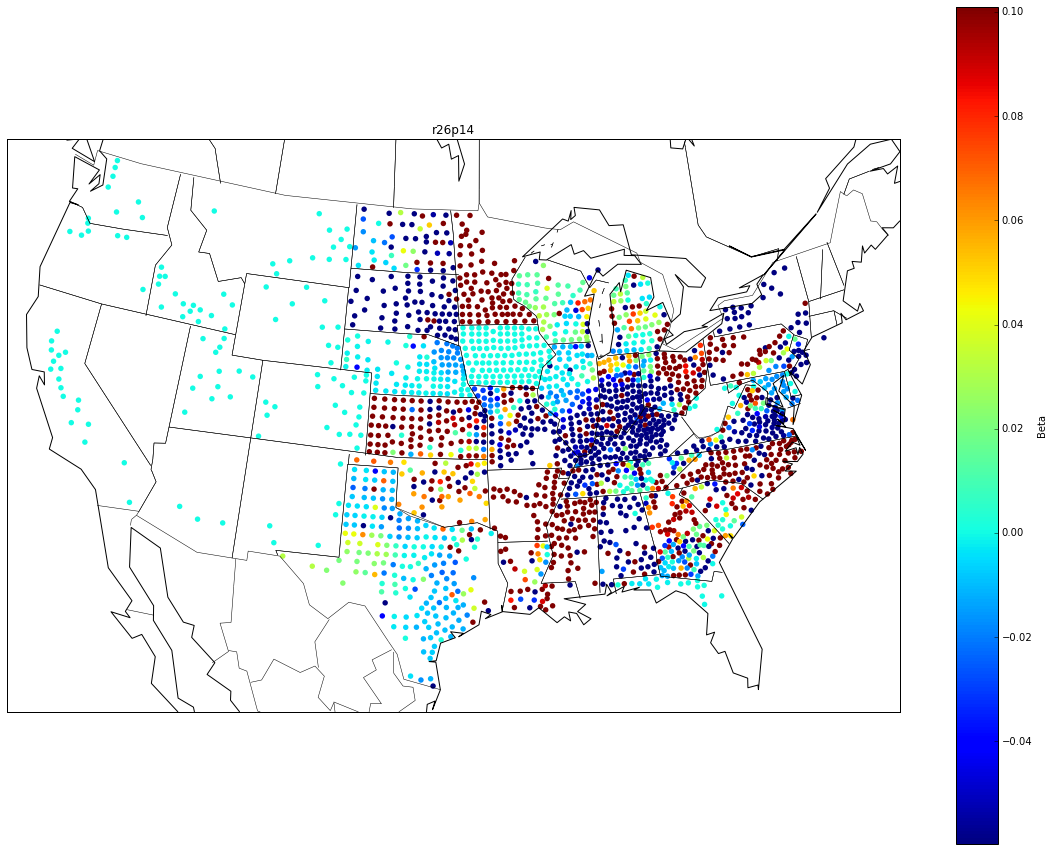

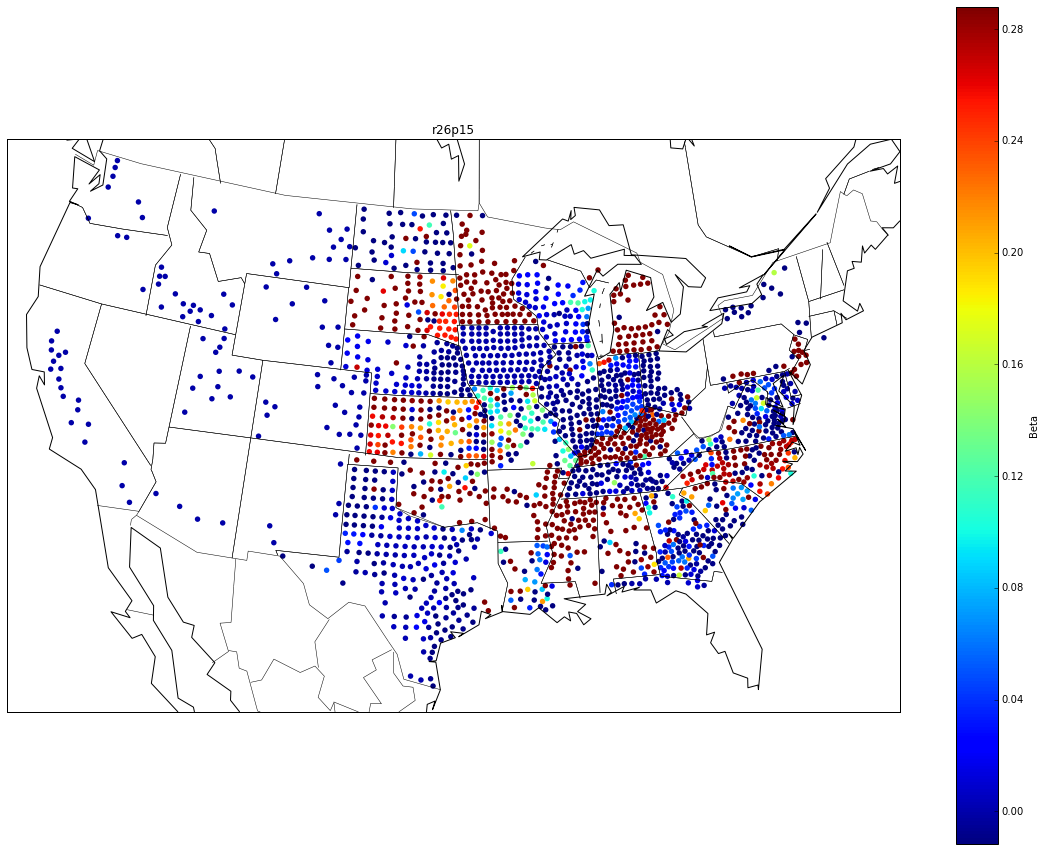

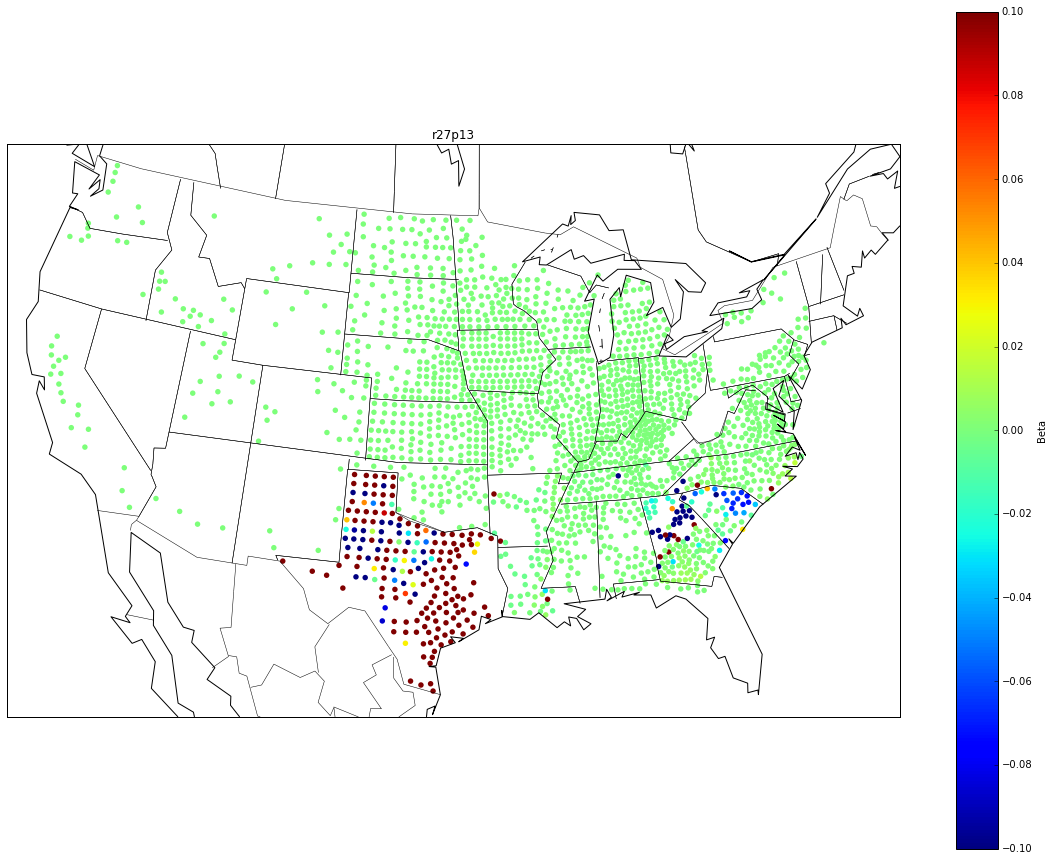

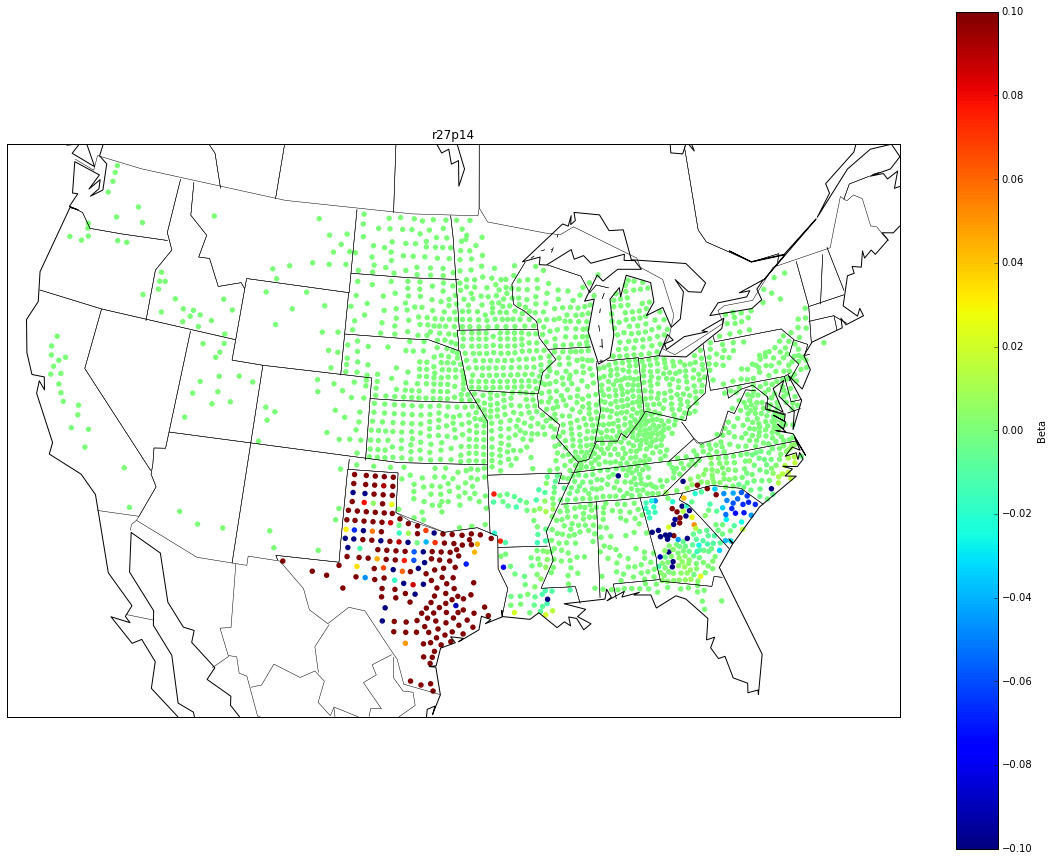

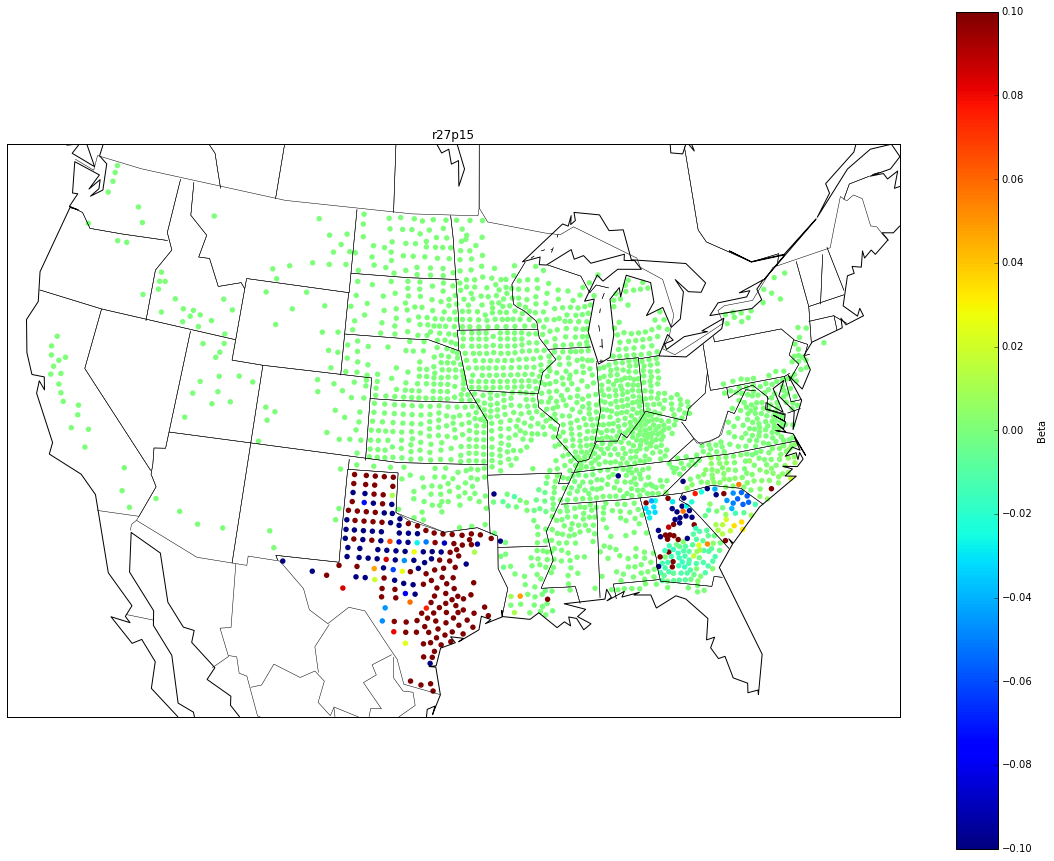

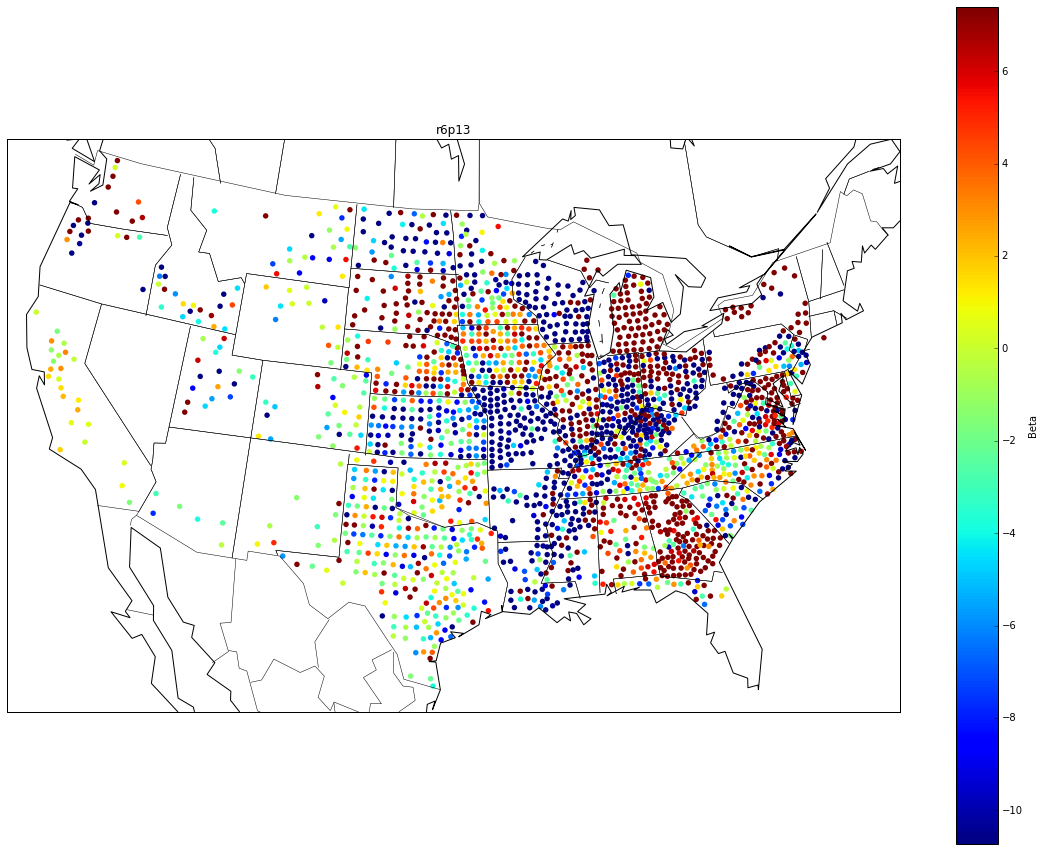

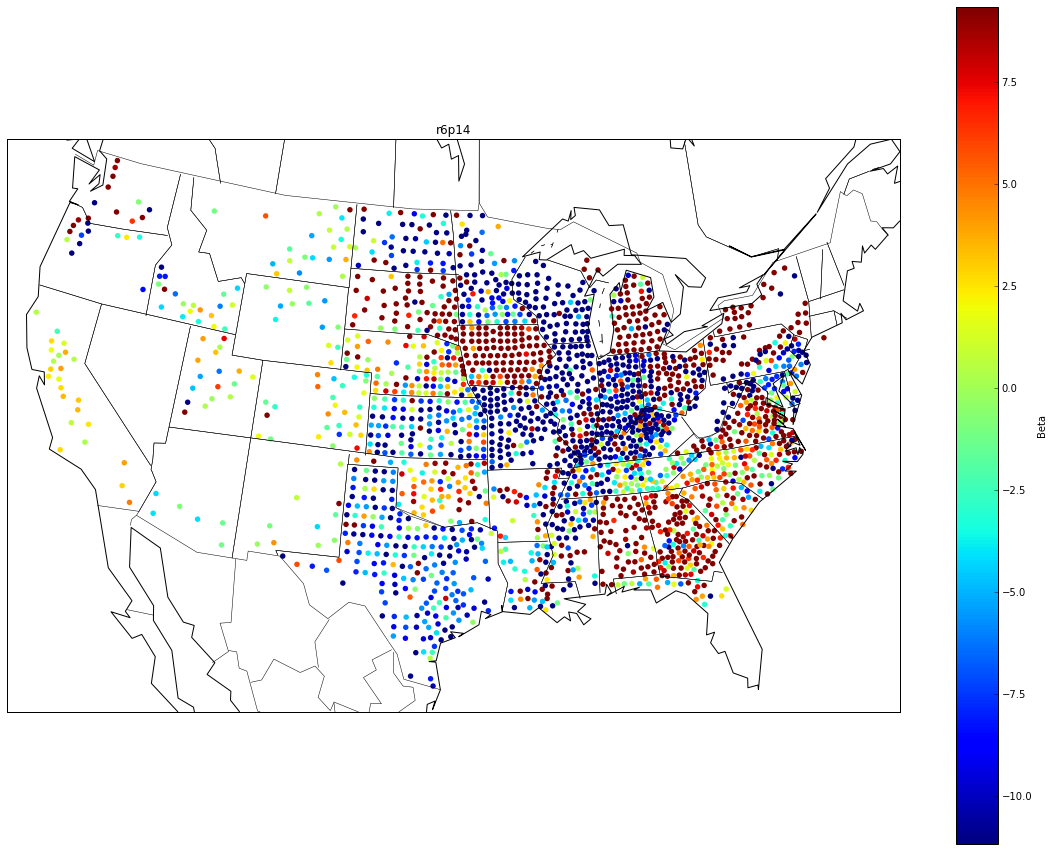

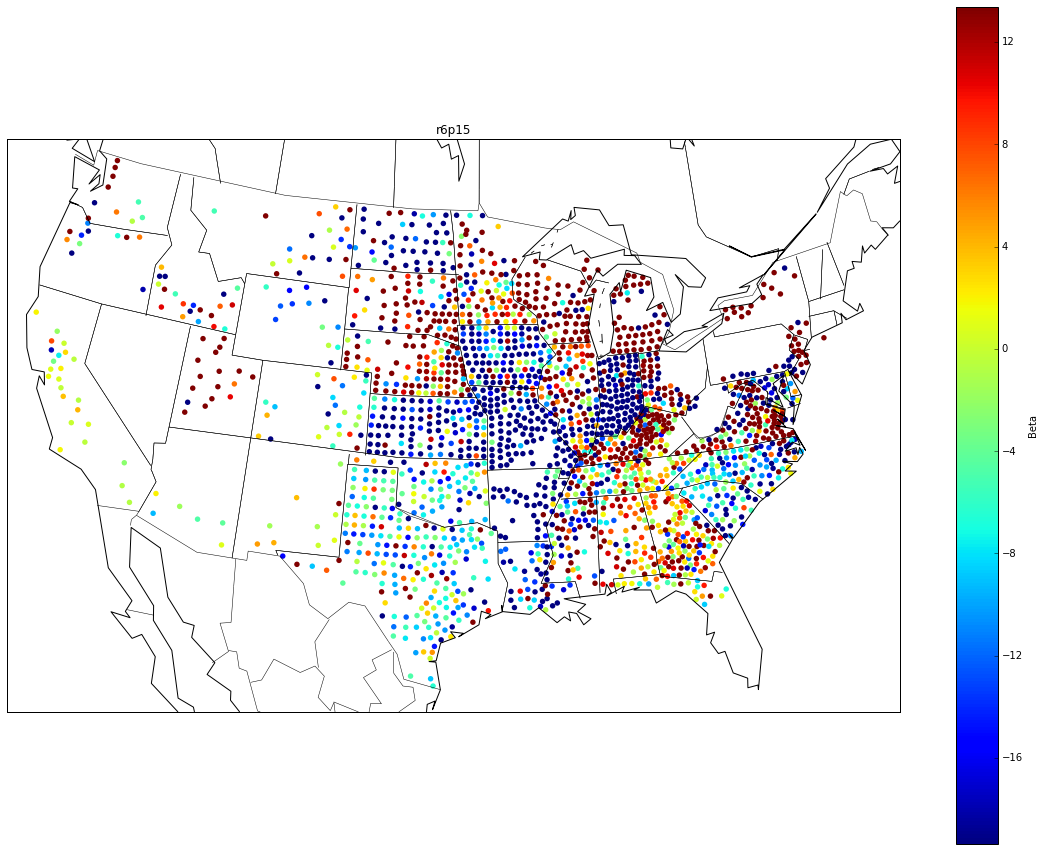

In [7]:
dirs = os.listdir(r"..\..\code\analysis_stage1\coefficients")
combined = pd.DataFrame()
combined = county_area*1
combined.rename(columns ={'GISJOIN':'countyID'},inplace = True)
combined.head()
for file in dirs:
    name = file.split('_')[-1].split('.')[0]
    coeff = pd.read_csv(r"..\..\code\analysis_stage1\coefficients\%s"%file)[['countyID','coeff']]
    coeff.rename(columns ={'coeff':'coeff%s'%name},inplace = True)
    combined = combined.merge(coeff,on='countyID')
    plt.figure(figsize=(20,15))
    # setup Lambert Conformal basemap.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    combined_clean = combined[['X','Y','coeff%s'%name]].dropna()
    x,y = m(combined_clean['X'].values, combined_clean['Y'].values)
    m.scatter(x, y, s =30,c = combined_clean['coeff%s'%name],cmap='jet',vmin=combined['coeff%s'%name].quantile(0.25), vmax=combined['coeff%s'%name].quantile(0.75),edgecolors ='None')
    # draw coastlines.
    m.drawstates()
    m.drawcoastlines()
    m.drawcountries()
    
    c = plt.colorbar(orientation='vertical')
    c.set_label("Beta")
    plt.title(name)
    plt.savefig(r'..\..\paper\figures\scatter_%s'%name,dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()
#     ax2 = combined['coeff%s'%name].hist(figsize=(30,30),bins=100,log=True)
#     fig2 = ax2.get_figure()
#     fig2.savefig(r'..\..\paper\figures\hist_%s'%name,dpi=300,figsize=(10,30))

In [4]:
# name = pd.read_csv('../../code/analysis_stage1/namesCombinedOrder.txt',sep ='"',header =None)
# name_clean =name[[1,3,5,7,9]]
# name_clean.head()

In [5]:
combined.describe().to_csv(r'..\..\paper\summary_stats_stage1.csv')

In [6]:

import matplotlib.pyplot as plt


